In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text']=df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text']=df['Text'].str.replace('[^\w\s]',' ')
stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df['Text']=df['Text'].apply(lambda x:str(TextBlob(x).correct()))
df['Text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.ssplit()]))
df.Text.head()

In [30]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

# Convert 'Text' column to string type to ensure all values are strings
df['Text'] = df['Text'].astype(str)

# Apply the lambda function to lowercase the text
df['Text']

,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price. there was a wide...
...,...
122150,within two hours of consuming xylosweet in a s...
122151,i was excited to find a natural sugar substitu...
122152,this is a great sweetener for diabetics. be ca...
122153,"having read many books on this subject, the ep..."


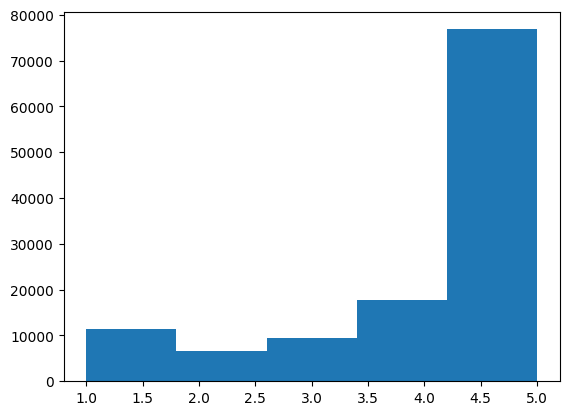

Score
1    11419
2     6621
3     9552
4    17690
5    76860
Name: Id, dtype: int64


In [31]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [32]:
import pandas as pd

# ... (Code to create score_1, score_2, score_3, score_4, score_5 DataFrames) ...
# The code below was likely not executed before the cell that uses these variables.
# Make sure this cell is run before the cell that uses score_1, score_2, score_3, score_4, and score_5
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

# Now, you can use 'reviews_sample' in the current cell:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1, 2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4, 5])]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()


In [33]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

print(reviews_sample.groupby('Score'))

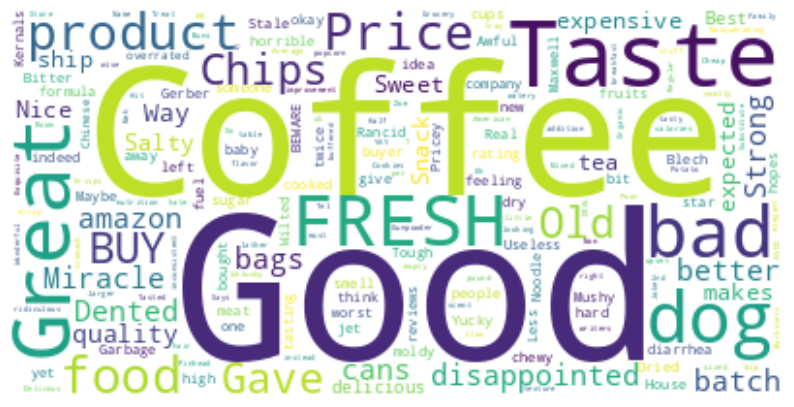

In [34]:
!pip install wordcloud # Install the wordcloud module
from wordcloud import WordCloud, STOPWORDS # Import WordCloud and STOPWORDS
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str) # Use WordCloud instead of wordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([4,5])]

negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=positive_reviews.Summary.str.cat()

In [36]:
# Make sure to execute the following code in a previous cell to create 'reviews_sample':
import pandas as pd

# ... (Code to create score_1, score_2, score_3, score_4, score_5 DataFrames) ...

reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

# Now, you can use 'reviews_sample' in the current cell:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1, 2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4, 5])]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

In [37]:
!pip install vaderSentiment

In [38]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp=sns.color_palette()
analyzer = SentimentIntensityAnalyzer()

empltyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    empltyline.append(vs)
df_sent=pd.DataFrame(empltyline)
df_sent.head()

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.085,0.771,0.144,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468
